#Tugas



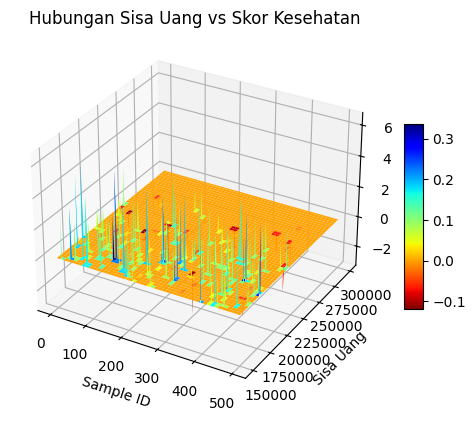

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


NPM = 19102
np.random.seed(NPM)

budget_awal = 1e6  # Rupiah

# Base weight factors
wkenyang_base = 0.8
wrasa_base    = 0.7
wsehat_base   = 0.9
wbosan_base   = 0.2

SAMPLE_NUM = 500
HARI = 31

# ==========================
# DATA STRUCTURES
# ==========================

skor  = np.zeros(SAMPLE_NUM)
sisa  = np.zeros(SAMPLE_NUM)
sehat = np.zeros(SAMPLE_NUM)

SISA_MIN = 150e3
SISA_MAX = 300e3
bin_sisa = np.arange(SISA_MIN, SISA_MAX, 1000)

resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)))
resp_pilih = np.zeros((SAMPLE_NUM, 62))  # 31 hari × 2 (pagi/malam)

# ==========================
# SIMULASI POLA MAKAN
# ==========================

def hitung_skor_makanan(pilihan, w_kenyang, w_rasa, w_sehat, w_bosan):
    return (
        w_kenyang * makan['kenyang'][pilihan] +
        w_rasa    * makan['rasa'][pilihan]   +
        w_sehat   * makan['sehat'][pilihan]  -
        w_bosan   * makan['bosan'][pilihan]
    )

for n in range(SAMPLE_NUM):
    budget = budget_awal
    total_skor = 0
    total_sehat = 0

    for i in range(HARI):
        # --- Pagi ---
        pilihan = np.random.randint(0, len(makan))
        total_skor  += hitung_skor_makanan(
            pilihan,
            np.random.normal(wkenyang_base, 0.2),
            np.random.normal(wrasa_base,    0.2),
            np.random.normal(wsehat_base,   0.4),
            np.random.normal(wbosan_base,   0.2),
        )
        total_sehat += makan['sehat'][pilihan] - 0.5
        budget      -= makan['harga'][pilihan]
        resp_pilih[n][2*i] = pilihan

        # --- Malam ---
        pilihan = np.random.randint(0, len(makan))
        total_skor  += hitung_skor_makanan(
            pilihan,
            np.random.normal(wkenyang_base, 0.2),
            np.random.normal(wrasa_base,    0.2),
            np.random.normal(wsehat_base+0.2, 0.4),
            np.random.normal(wbosan_base*2,   0.2),
        )
        total_sehat += makan['sehat'][pilihan] - 0.5
        budget      -= makan['harga'][pilihan]
        resp_pilih[n][2*i+1] = pilihan

    sisa[n]  = budget
    skor[n]  = total_skor
    sehat[n] = total_sehat

    idx_sisa = int((budget - SISA_MIN) / 1000)
    if 0 <= idx_sisa < len(bin_sisa):
        resp_sehat[n][idx_sisa] = total_sehat

# ==========================
# VISUALISASI RESPON KESEHATAN
# ==========================

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X, Y = np.meshgrid(np.arange(SAMPLE_NUM), bin_sisa)
surf = ax.plot_surface(X, Y, resp_sehat.T, cmap='jet_r', edgecolor='none')

ax.set_title("Hubungan Sisa Uang vs Skor Kesehatan")
ax.set_xlabel("Sample ID")
ax.set_ylabel("Sisa Uang")
ax.set_zlabel("Skor Kesehatan")

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()


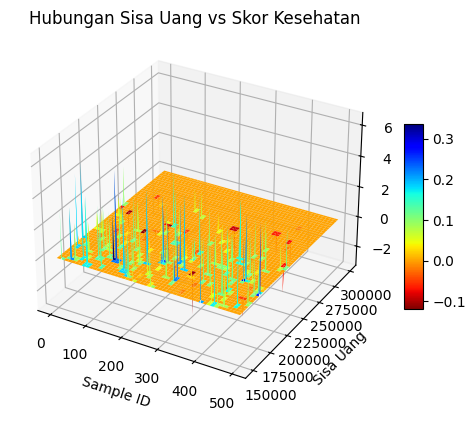

(1) Jumlah pola makan sehat: 427
(2) Pola makan sehat & sisa uang positif: 427
(3) Best sample index: 330
    Skor total: 109.64645655830239
    Skor sehat: 4.8
    Sisa uang : 148000.0

(4) Jadwal makanan terbaik:
Hari 01: Pagi = bakso, Malam = soto
Hari 02: Pagi = capcay, Malam = miepangsit
Hari 03: Pagi = seblak, Malam = cireng
Hari 04: Pagi = ayamgeprek, Malam = roti
Hari 05: Pagi = mi instan , Malam = bebek
Hari 06: Pagi = bakso, Malam = nasipadang
Hari 07: Pagi = miepangsit, Malam = seblak
Hari 08: Pagi = seblak, Malam = seblak
Hari 09: Pagi = nasi telur, Malam = nasipadang
Hari 10: Pagi = miepangsit, Malam = soto
Hari 11: Pagi = bakso, Malam = bakso
Hari 12: Pagi = mieayam, Malam = ayamgeprek
Hari 13: Pagi = warteg, Malam = nasigoreng
Hari 14: Pagi = miepangsit, Malam = mieayam
Hari 15: Pagi = nasigoreng, Malam = nasipadang
Hari 16: Pagi = mieayam, Malam = warteg
Hari 17: Pagi = mieayam, Malam = nasigoreng
Hari 18: Pagi = bebek, Malam = miepangsit
Hari 19: Pagi = miepangsit, Mal

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NPM = 19102
np.random.seed(NPM)

budget_awal = 1e6  # Rupiah

# Base weight factors
wkenyang_base = 0.8
wrasa_base    = 0.7
wsehat_base   = 0.9
wbosan_base   = 0.2

SAMPLE_NUM = 500
sampleid = np.arange(0, SAMPLE_NUM)

skor = np.zeros(SAMPLE_NUM, dtype=np.double)
sisa = np.zeros(SAMPLE_NUM, dtype=np.double)
sehat = np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM = 150e3
SISA_MAKSIMUM = 300e3
bin_sisa = np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)

resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=np.double)  # 31 hari * 2 makan

# ==========================
# SIMULASI POLA MAKAN
# ==========================
for n in range(SAMPLE_NUM):
    budget = budget_awal
    skor_kumulatif = 0
    skor_sehat = 0

    for i in range(31):  # 31 hari

        # --- Makan Pagi ---
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa    = np.random.normal(loc=wrasa_base,    scale=0.2)
        w_sehat   = np.random.normal(loc=wsehat_base,   scale=0.4)
        w_bosan   = np.random.normal(loc=wbosan_base,   scale=0.2)

        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa  * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan]
        )
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]
        resp_pilih[n][2*i] = pilihan

        # --- Makan Malam ---
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa    = np.random.normal(loc=wrasa_base,    scale=0.2)
        w_sehat   = np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan   = np.random.normal(loc=wbosan_base*2, scale=0.2)

        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa  * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan]
        )
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]
        resp_pilih[n][2*i + 1] = pilihan

    # Simpan hasil akhir
    sisa[n] = budget
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat

    idx_sisa = int((budget - SISA_MININUM) / 1000)
    if 0 <= idx_sisa < len(bin_sisa):
        resp_sehat[n][idx_sisa] = skor_sehat

# ==========================
# VISUALISASI RESPON KESEHATAN
# ==========================
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

Y, X = np.meshgrid(bin_sisa, sampleid)
surf = ax.plot_surface(X, Y, resp_sehat, cmap='jet_r', edgecolor='none')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
ax.set_title("Hubungan Sisa Uang vs Skor Kesehatan")
ax.set_xlabel("Sample ID")
ax.set_ylabel("Sisa Uang")
ax.set_zlabel("Skor Kesehatan")
plt.show()

#TUgasssssssss
# (1) pola makan dengan skor sehat positif
idx_sehat = np.where(sehat > 0)[0]
print("(1) Jumlah pola makan sehat:", len(idx_sehat))

# (2) dari (1) yang sisa uang positif
idx_sehat_sisa = idx_sehat[sisa[idx_sehat] > 0]
print("(2) Pola makan sehat & sisa uang positif:", len(idx_sehat_sisa))

# (3) titik dengan skor kumulatif terbesar
if len(idx_sehat) > 0:
    kandidat = idx_sehat_sisa if len(idx_sehat_sisa) > 0 else idx_sehat
    best_idx = kandidat[np.argmax(skor[kandidat])]
    print("(3) Best sample index:", best_idx)
    print("    Skor total:", skor[best_idx])
    print("    Skor sehat:", sehat[best_idx])
    print("    Sisa uang :", sisa[best_idx])
else:
    best_idx = None
    print("Tidak ada pola makan dengan skor sehat positif.")

# (4) tampilkan jadwal makan
if best_idx is not None:
    print("\n(4) Jadwal makanan terbaik:")
    jadwal_idx = resp_pilih[best_idx].astype(int)
    for hari in range(31):
        pagi = makan['makanan'][jadwal_idx[2*hari]]
        malam = makan['makanan'][jadwal_idx[2*hari+1]]
        print(f"Hari {hari+1:02d}: Pagi = {pagi}, Malam = {malam}")

Tujuan utama dari kode ini adalah untuk melakukan simulasi dan analisis pola konsumsi makanan selama 31 hari berdasarkan berbagai faktor seperti rasa, tingkat kenyang, kesehatan, kebosanan, serta pengaruh keterbatasan anggaran. Dengan memanfaatkan pendekatan probabilistik melalui random sampling sebanyak 500 skenario, program ini merepresentasikan perilaku pemilihan makanan yang dinamis dan realistis, seolah-olah mencerminkan preferensi manusia yang tidak selalu konsisten setiap hari. Setiap makanan dinilai berdasarkan empat dimensi penilaian utama dengan bobot yang berubah-ubah secara acak agar variasi keputusan lebih alami. Selain itu, setiap pilihan dikurangkan langsung dari anggaran awal sebesar satu juta rupiah sehingga faktor ekonomi ikut menjadi pertimbangan eksplisit dalam evaluasi. Di akhir simulasi, program tidak hanya mengukur seberapa sehat pola makan yang terbentuk, tetapi juga apakah seseorang mampu menjaga kesehatannya tanpa menghabiskan seluruh uangnya.

Kesimpulan dari eksekusi kode ini adalah bahwa simulasi berhasil mengidentifikasi pola makan yang tidak hanya sehat (memiliki skor kesehatan positif), melainkan juga efisien secara finansial (memiliki sisa uang positif). Program juga menampilkan skenario terbaik berdasarkan skor kumulatif tertinggi dan memberikan rincian jadwal makan harian dari kandidat tersebut. Visualisasi 3D yang disertakan membantu memahami hubungan antara sisa anggaran dan skor kesehatan secara komprehensif. Dengan demikian, kode ini dapat dijadikan alat bantu untuk merancang strategi diet optimal berbasis data dengan mempertimbangkan aspek gizi, preferensi personal, serta keterbatasan biaya. Kode ini memiliki potensi untuk dikembangkan menjadi sistem rekomendasi makanan otomatis yang lebih presisi dan personal.